# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    #проверка на нули в массиве
    if 0 not in arr:
        return None

    #поиск индексов нулей
    zero_indices = np.where(arr == 0)[0]

    #поиск индексов элементов после нулей
    next_indices = zero_indices + 1

    #фильтр индексов по длине массива
    valid_indices = next_indices[next_indices < len(arr)]

    #если нет нулей
    if len(valid_indices) == 0:
        return None

    #максимальнон среди нпйденных
    return np.max(arr[valid_indices])

#вывод
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print("максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой:", max_element(x))

максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    #абсолютная разница между элементом матрицы и v
    diff = np.abs(X - v)

    #индекс наименьшей разницы
    min_index = np.unravel_index(np.argmin(diff), X.shape)

    #возврат соответствующего элемента
    return X[min_index]

#вывод
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print("ближайший к числу", v, "элемент в матрице:\n", X)
print(nearest_value(X, v))  # Output: 4

ближайший к числу 3.6 элемент в матрице:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    #среднее значение каждого столбца
    mean = X.mean(axis=0)

    #стандартное отклонение каждого столбца
    std = X.std(axis=0)

    #заменяем стандартные отклонения равные 0 на 1, чтобы не делить на ноль
    std[std == 0] = 1

    #масштабируем каждый столбец
    return (X - mean) / std

#вывод
X = np.random.randint(0, 10, (5, 4))
print("исходная матрица:\n", X)
print("масштабированная матрица:\n", scale(X))

исходная матрица:
 [[4 6 5 9]
 [1 5 2 5]
 [7 4 7 1]
 [6 1 1 4]
 [8 8 6 1]]
масштабированная матрица:
 [[-0.48349378  0.51832106  0.34554737  1.68549966]
 [-1.69222822  0.08638684 -0.95025527  0.33709993]
 [ 0.72524067 -0.34554737  1.2094158  -1.01129979]
 [ 0.32232919 -1.64135001 -1.38218948  0.        ]
 [ 1.12815215  1.38218948  0.77748158 -1.01129979]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    #проверка на квадратность
    if X.shape[0] != X.shape[1]:
        raise ValueError("Матрица должна быть квадратной!")

    #определитель
    det = np.linalg.det(X)

    #сумма элементов по диагонали (след)
    trace = np.trace(X)

    #минимальный и максимальный элементы
    min_val = np.min(X)
    max_val = np.max(X)

    #норма Фробениуса (корень из суммы квадратов всех элементов)
    frobenius_norm = np.linalg.norm(X, 'fro')

    #собственные числа
    eigenvalues = np.linalg.eigvals(X)

    #обратная матрица (если есть такаяя)
    try:
        inv_matrix = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inv_matrix = None

    return det, trace, min_val, max_val, frobenius_norm, eigenvalues, inv_matrix

#вывод
X = np.random.normal(10, 1, (5, 5))
properties = get_stats(X)

print("матрица:\n", X)
print("определитель:", properties[0])
print("след:", properties[1])
print("минимальный элемент:", properties[2])
print("максимальный элемент:", properties[3])
print("норма Фробениуса:", properties[4])
print("собственные числа:", properties[5])
print("обратная матрица:\n", properties[6])

матрица:
 [[ 9.99655396  9.735424    9.33833788 12.54992792 11.58170978]
 [10.2954858  12.08296827  9.08437871  9.9809002   9.68950869]
 [10.12640823 10.66126133 11.27775132  9.72259167 10.35309677]
 [ 9.64065197  8.865174   10.50807305  8.88260822 10.16260586]
 [11.28714581  9.5752376  10.06440896  8.72414421 10.18973477]]
определитель: 103.20181383352248
след: 52.4296165411223
минимальный элемент: 8.72414421257908
максимальный элемент: 12.549927922005933
норма Фробениуса: 51.0992904269656
собственные числа: [50.88318564+0.j         -0.82953816+0.21677849j -0.82953816-0.21677849j
  1.60275361+0.43609201j  1.60275361-0.43609201j]
обратная матрица:
 [[ 0.16657277 -0.48257562  0.72919005 -1.38514435  0.91013401]
 [-0.2419857   0.57492159 -0.53708524  0.71419772 -0.43825616]
 [ 0.03450721 -0.54879424  1.15551107 -0.87101829  0.17729526]
 [ 0.48084321 -0.7061234   1.47173271 -1.87301384  0.49762948]
 [-0.40288593  1.14090335 -2.70437854  3.32711708 -1.09935853]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
results = []

#цикл на повторение
for _ in range(100):
    #генерация двух случайных матриц 10x10 из стандартного нормального распределения
    A = np.random.standard_normal((10, 10))
    B = np.random.standard_normal((10, 10))

    #перемножаем матрицы
    product = A @ B

    #поиск максимального элемента
    max_element = np.max(product)

    #добавляем максимальный элемент с список
    results.append(max_element)

#среднее значение максимальных элементов
mean_value = np.mean(results)

#95-процентная квантиль
quantile_95 = np.quantile(results, 0.95)

#вывод
print("среднее значение: ", mean_value)
print("95-процентная квантиль: ", quantile_95)

среднее значение:  8.663206249641012
95-процентная квантиль:  11.556988173328936


### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

#вывод первых строк
print(flights.head())

#коды отмены:
#A - Carrier (Авиакомпания)
#B - Weather (Погода)
#C - NAS (Национальная система управления воздушным движением)
#D - Security (Безопасность)

#удаление пустых хначений в 'CancellationCode', так как они не влияют на подсчет
flights_cleaned = flights.dropna(subset=['CancellationCode'])

#количество каждого уникального значения в столбце 'CancellationCode'
cancellation_counts = flights_cleaned['CancellationCode'].value_counts()

#поиск самого частого кода отмены
most_frequent_cancellation_code = cancellation_counts.idxmax()
most_frequent_count = cancellation_counts.max()

#вывод
print(f"самая частая причина: {most_frequent_cancellation_code} ({most_frequent_count} раз)")

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      6          18          3   2111.0        2055   2308.0   
1  2008      6           4          3   1426.0        1410   1730.0   
2  2008      8           3          7   1143.0        1145   1501.0   
3  2008      1          23          3   1141.0        1144   1323.0   
4  2008      5           4          7    815.0         820   1243.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2300            WN        242  ...    3.0      8.0          0   
1        1728            XE       2380  ...    4.0     12.0          0   
2        1520            WN       1769  ...    4.0      9.0          0   
3        1335            OO       3802  ...    4.0     19.0          0   
4        1300            WN        399  ...    4.0      8.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN   

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
#удаляем пустые значения в 'Distance'
flights_cleaned = flights.dropna(subset=['Distance'])

#статистические показатели для столбца 'Distance'
distance_stats = {
    'среднее': flights_cleaned['Distance'].mean(),
    'минимальное': flights_cleaned['Distance'].min(),
    'максимальное': flights_cleaned['Distance'].max()
}

#вывод
for stat, value in distance_stats.items():
    print(f"{stat} расстояние: {value:.2f} миль")

среднее расстояние: 724.51 миль
минимальное расстояние: 31.00 миль
максимальное расстояние: 4962.00 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
#минимальное расстояние
min_distance = flights_cleaned['Distance'].min()

#отфильтровка данных, где расстояние равно минимальному
min_distance_flights = flights_cleaned[flights_cleaned['Distance'] == min_distance]

#вывод
print(f"минимальное расстояние: {min_distance} миль")
print("\nрейсы с минимальным расстоянием:")
display(min_distance_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']])

#для каждого уникального рейса (FlightNum) проверяем расстояние в другие дни
unique_flights = min_distance_flights['FlightNum'].unique()
print("\nпроверка расстояний для этих рейсов в другие дни:")
for flight_num in unique_flights:
    #берем все записи для данного рейса, кроме тех, где расстояние минимальное
    other_days_distances = flights_cleaned[
        (flights_cleaned['FlightNum'] == flight_num) & (flights_cleaned['Distance'] != min_distance)
    ]['Distance']

    if not other_days_distances.empty:
        print(f"Рейс {flight_num}: расстояния в иные дни — {list(other_days_distances.unique())}")
    else:
        print(f"Рейс {flight_num}: нет других записей с этим номером рейса.")

минимальное расстояние: 31 миль

рейсы с минимальным расстоянием:


,Year,Month,DayofMonth,FlightNum,UniqueCarrier,Origin,Dest,Distance
1116,2008,12,30,65,AS,WRG,PSG,31
6958,2008,12,26,65,AS,WRG,PSG,31
17349,2008,8,18,64,AS,PSG,WRG,31
27534,2008,3,11,64,AS,PSG,WRG,31
46082,2008,8,9,65,AS,WRG,PSG,31
48112,2008,2,28,64,AS,PSG,WRG,31



проверка расстояний для этих рейсов в другие дни:
Рейс 65: расстояния в иные дни — [680, 82, 571, 2454, 1005, 581, 1747, 123, 281, 682, 372, 386]
Рейс 64: расстояния в иные дни — [533, 680, 2381, 82, 1005, 123, 359, 1747, 372, 883, 571, 414]


**на мой взгляд - нет**, ничего странного нет, 31 миля это мало, да, но некоторые такси вызывают, чтобы 300 метров проехать

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
#количество вылетов для каждого аэропорта
departure_counts = flights['Origin'].value_counts()

#аэропорт с максимальным количеством вылетов
most_flights_airport = departure_counts.idxmax()
most_flights_count = departure_counts.max()

print(f"аэропорт: {most_flights_airport} ({most_flights_count} вылетов)")

#дополнительные данные об аэропортах
airports = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                       header=None,
                       names=['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude',
                              'Altitude', 'Timezone', 'DST', 'TzDatabaseTimezone', 'Type', 'Source'])

#фильтровка данных для поиска города для найденного аэропорта
airport_info = airports[airports['IATA'] == most_flights_airport]

#вывод
if not airport_info.empty:
    city = airport_info['City'].values[0]
    print(f"город: {city}")
else:
    print("информация об аэропорте не найдена.")

аэропорт: ATL (4134 вылетов)
город: Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
#удаляем строки с пустыми значениями в 'AirTime' и 'Origin'
flights_cleaned = flights.dropna(subset=['AirTime', 'Origin'])

#группируем по аэропорту отправления, вычисляем среднее время полета
average_airtime_by_airport = flights_cleaned.groupby('Origin')['AirTime'].mean()

#находим аэропорт с максимальным средним временем полета
airport_with_max_airtime = average_airtime_by_airport.idxmax()
max_average_airtime = average_airtime_by_airport.max()

#вывод
print(f"аэропорт с наибольшим средним временем: {airport_with_max_airtime}")
print(f"среднее время полета: {max_average_airtime:.2f} минут")

аэропорт с наибольшим средним временем: SJU
среднее время полета: 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
#удаляем строки с пропущенными значениями в столбцах 'DepDelay'
flights_cleaned = flights.dropna(subset=['DepDelay'])

#добавляем столбец, указывающий, был ли рейс задержан, используя .loc
flights_cleaned = flights_cleaned.copy()  # Создаем явную копию, чтобы избежать предупреждения
flights_cleaned.loc[:, 'IsDelayed'] = flights_cleaned['DepDelay'] > 0

#группируем данные по аэропорту отправления и считаем общее количество рейсов и количество задержанных рейсов
delay_stats = flights_cleaned.groupby('Origin').agg(
    TotalFlights=('DepDelay', 'count'),
    DelayedFlights=('IsDelayed', 'sum')
)

#доля задержанных рейсов
delay_stats['DelayRatio'] = delay_stats['DelayedFlights'] / delay_stats['TotalFlights']

#отфильтровываем аэропорты с менее чем 1000 вылетами
delay_stats_filtered = delay_stats[delay_stats['TotalFlights'] >= 1000]

#аэропорт с максимальной долей задержек
airport_with_max_delay_ratio = delay_stats_filtered['DelayRatio'].idxmax()
max_delay_ratio = delay_stats_filtered['DelayRatio'].max()

#вывод
print(f"аэропорт с наибольшей долей задержек: {airport_with_max_delay_ratio}")
print(f"доля задержек: {max_delay_ratio:.2%}")

аэропорт с наибольшей долей задержек: EWR
доля задержек: 52.87%


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [14]:
#пропущенные значени в датасете
print("имеются ли пропущенные значения? ", flights.isnull().values.any())

#общее количество пропущенных элементов в таблице
total_missing_values = flights.isnull().sum().sum()
print(f"общее количество пропущенных элементов: {total_missing_values}")

#количество объектов (строк), имеющих хотя бы один пропуск
rows_with_missing = flights[flights.isnull().any(axis=1)]
print(f"количество объектов с хотя бы одним пропуском: {len(rows_with_missing)}")

#количество признаков (столбцов), имеющих хотя бы одно пропущенное значение
columns_with_missing = flights.columns[flights.isnull().any()]
print(f"количество признаков с пропущенными значениями: {len(columns_with_missing)}")
print(f"признаки с пропущенными значениями: {list(columns_with_missing)}")

имеются ли пропущенные значения?  True
общее количество пропущенных элементов: 355215
количество объектов с хотя бы одним пропуском: 70000
количество признаков с пропущенными значениями: 16
признаки с пропущенными значениями: ['DepTime', 'ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
#проверка пропущенных значений в целевой переменной
target_variable = 'DepDelay'
missing_in_target = flights[target_variable].isnull().sum()
print(f"пропущенных значений: {missing_in_target}")

#анализ объектов с пропущенными значениями
flights_with_missing_target = flights[flights[target_variable].isnull()]
print("\nанализ объектов с пропущенными значениями:")
display(flights_with_missing_target.describe())

#исключаем объекты с пропущенным значением целевой переменной
flights_cleaned = flights.dropna(subset=[target_variable])

#исключаем объекты со значением целевой переменной, равным 0
flights_cleaned = flights_cleaned[flights_cleaned[target_variable] != 0]

#выделяем целевую переменную в вектор
y = flights_cleaned[target_variable]
X = flights_cleaned.drop(columns=[target_variable])

print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

пропущенных значений: 1399

анализ объектов с пропущенными значениями:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1399.0,1399.000000,1399.000000,1399.000000,0.0,1399.000000,0.0,1399.000000,1399.000000,0.0,...,1399.000000,0.0,0.0,1399.0,1399.0,0.0,0.0,0.0,0.0,0.0
mean,2008.0,5.646891,15.562545,3.987848,NaN,1379.989993,NaN,1543.809149,2789.937098,NaN,...,585.818442,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
std,0.0,3.705114,8.585107,2.018653,NaN,462.847110,NaN,480.819451,2131.389377,NaN,...,461.874840,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,2008.0,1.000000,1.000000,1.000000,NaN,50.000000,NaN,2.000000,5.000000,NaN,...,31.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
25%,2008.0,2.000000,9.000000,2.000000,NaN,1000.000000,NaN,1145.000000,895.000000,NaN,...,256.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
50%,2008.0,5.000000,15.000000,4.000000,NaN,1420.000000,NaN,1605.000000,2309.000000,NaN,...,448.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
75%,2008.0,9.000000,22.000000,6.000000,NaN,1755.000000,NaN,1940.000000,4444.000000,NaN,...,761.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
max,2008.0,12.000000,31.000000,7.000000,NaN,2359.000000,NaN,2359.000000,7794.000000,NaN,...,2704.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN



Размерность X: (63404, 28)
Размерность y: (63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
#разделение времени на часы и минуты
def split_time(df, column_name):
    #новые столбцы для часов и минут
    df[f"{column_name}_Hour"] = np.where(
        df[column_name].notnull(),
        df[column_name] // 100,  # Целочисленное деление для получения часа
        np.nan  # Пропуск для NaN значений
    )
    df[f"{column_name}_Minute"] = np.where(
        df[column_name].notnull(),
        df[column_name] % 100,  # Остаток от деления для получения минут
        np.nan  # Пропуск для NaN значений
    )
    #удаление исходного столбца
    df.drop(columns=[column_name], inplace=True)

#применяяем функцию
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for col in time_columns:
    if col in flights.columns:
        split_time(flights, col)

#вывод
display(flights.head())

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [17]:
#признаки для исключения
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year']

#проверяем наличие этих признаков в датасете и исключаем их
flights_cleaned = flights.drop(columns=features_to_drop, errors='ignore')

#вывод
print("признаки после исключения:")
print(flights_cleaned.columns.tolist())

признаки после исключения:
['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'AirTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**TailNum, Year** - исключены по заданию

**ArrDelay, ActualElapsedTime, CRSElapsedTime** - во многих случаях полностью составляют целевую переменную (суммарно и с пересечениями) и имеют много пропусков

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#загрузка данных (у меня почему-то все ломается, если их тут не загружать, хотя они уже подгружены вообще-то)
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

#исключаем целевую переменную и предыдущие исключения
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year', 'DepDelay']
X = flights.drop(columns=features_to_drop, errors='ignore')
y = flights['DepDelay']

#делим признаки на вещественные и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

#создаем трансформеры для обработки данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Заполняем пропуски медианой
    ('scaler', StandardScaler())  # Стандартизация
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполняем пропуски наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

#объединяем трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#применяем преобразования
X_prepared = preprocessor.fit_transform(X)

#вывод
print(f"размерность преобразованных данных: {X_prepared.shape}")

размерность преобразованных данных: (70000, 638)


<Axes: >

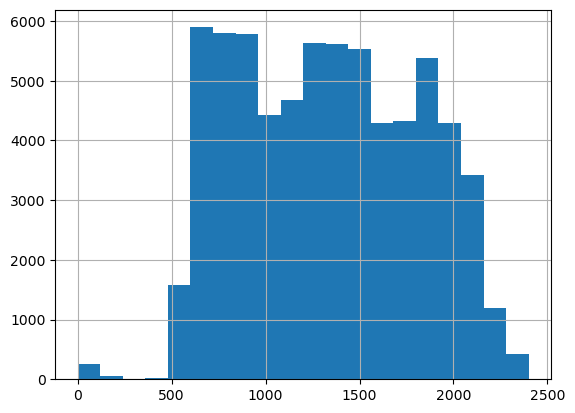

In [19]:
X['DepTime'].hist(bins=20)

<Axes: >

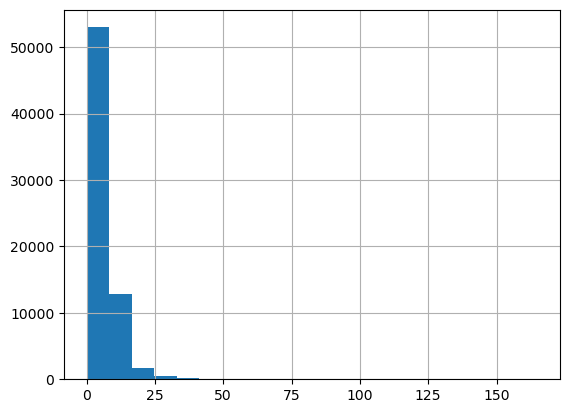

In [20]:
X['TaxiIn'].hist(bins=20)

<Axes: >

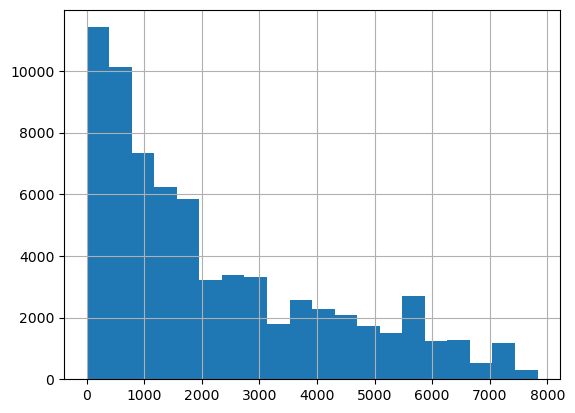

In [21]:
X['FlightNum'].hist(bins=20)

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [22]:
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    #копируем, чтобы не изменять исходник
    data_transformed = data.copy()

    #делим признаки на вещественные и категориальные
    numeric_features = data_transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = data_transformed.select_dtypes(include=['object']).columns.tolist()

    #1.замена пропущенных значений
    #для вещественных признаков заменяем NaN на 0
    data_transformed[numeric_features] = data_transformed[numeric_features].fillna(0)
    #для категориальных признаков заменяем NaN на строку 'nan'
    data_transformed[categorical_features] = data_transformed[categorical_features].fillna('nan')

    #2.масштабирование вещественных признаков
    scaler = StandardScaler()
    data_transformed[numeric_features] = scaler.fit_transform(data_transformed[numeric_features])

    #3.One-hot-кодирование категориальных признаков
    if len(categorical_features) > 0:
        #преобразуем категориальные признаки в словарь для DictVectorizer
        categorical_data = data_transformed[categorical_features].to_dict(orient='records')

        #применяем DictVectorizer
        vec = DictVectorizer(sparse=False)
        categorical_encoded = vec.fit_transform(categorical_data)

        #создаем DataFrame для закодированных категориальных признаков
        categorical_encoded_df = pd.DataFrame(
            categorical_encoded,
            columns=vec.get_feature_names_out(),
            index=data_transformed.index
        )

        #удаляем исходные категориальные признаки
        data_transformed.drop(columns=categorical_features, inplace=True)

        #добавляем закодированные категориальные признаки
        data_transformed = pd.concat([data_transformed, categorical_encoded_df], axis=1)

    return data_transformed

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [23]:
#исключаем
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year', 'DepDelay']
X = flights.drop(columns=features_to_drop, errors='ignore')

#применяем функцию
X_transformed = transform_data(X)

#вывод
print(f"размерность преобразованных данных: {X_transformed.shape}")
print(f"количество признаков после преобразования: {X_transformed.shape[1]}")

размерность преобразованных данных: (70000, 639)
количество признаков после преобразования: 639


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [24]:
from sklearn.model_selection import train_test_split

#разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,  #матрица признаков после преобразования
    y,              #вектор целевой переменной
    test_size=0.3,  #30% данных для тестовой выборки
    random_state=42 #фиксируем случайность для воспроизводимости результатов
)

#вывод
print(f"размер обучающей выборки (X_train): {X_train.shape}")
print(f"размер тестовой выборки (X_test): {X_test.shape}")
print(f"размер вектора целевой переменной для обучающей выборки (y_train): {y_train.shape}")
print(f"размер вектора целевой переменной для тестовой выборки (y_test): {y_test.shape}")

размер обучающей выборки (X_train): (49000, 639)
размер тестовой выборки (X_test): (21000, 639)
размер вектора целевой переменной для обучающей выборки (y_train): (49000,)
размер вектора целевой переменной для тестовой выборки (y_test): (21000,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#проверка на NaN в данных
#сброс индексов для синхронизации X_train и y_train
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

#маска для удаления строк с NaN в y_train
non_nan_indices_train = ~np.isnan(y_train_reset)

#применяем маску
X_train_clean = X_train_reset[non_nan_indices_train]
y_train_clean = y_train_reset[non_nan_indices_train]

#используем только первые 1000 объектов из очищенной обучающей выборки, больше тыщу лет считает
X_train_subset = X_train_clean[:1000]
y_train_subset = y_train_clean[:1000]

#проврка тестовую выборку
#сброс индексов для синхронизации
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

#создаем маску для удаления строк с NaN в y_test
non_nan_indices_test = ~np.isnan(y_test_reset)

#применяем маску
X_test_clean = X_test_reset[non_nan_indices_test]
y_test_clean = y_test_reset[non_nan_indices_test]

#создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_subset, y_train_subset)

#предсказания на обучающей подвыборке и тестовой выборке
y_train_pred = model.predict(X_train_subset)
y_test_pred = model.predict(X_test_clean)

#есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred)):
    print("Внимание: Предсказания модели содержат NaN. Заменяем их на 0.")
    y_test_pred = np.nan_to_num(y_test_pred)

#вычисляем MSE и R^2
mse_train = mean_squared_error(y_train_subset, y_train_pred)
r2_train = r2_score(y_train_subset, y_train_pred)

mse_test = mean_squared_error(y_test_clean, y_test_pred)
r2_test = r2_score(y_test_clean, y_test_pred)

#вывод
print(f"MSE на обучающей подвыборке: {mse_train:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train:.2f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R^2 на тестовой выборке: {r2_test:.2f}")

#анализ коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_train_subset.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nнаиболее значимые коэффициенты:")
display(coefficients.head(10))

MSE на обучающей подвыборке: 44.05
R^2 на обучающей подвыборке: 0.96
MSE на тестовой выборке: 429341321032112348470444032.00
R^2 на тестовой выборке: -334727032455523249160192.00

наиболее значимые коэффициенты:


,Feature,Coefficient
12,Cancelled,-1.758031e+14
19,CancellationCode=A,8.963372e+13
24,Dest=ABI,7.947349e+13
22,CancellationCode=nan,-4.008905e+13
23,Dest=ABE,3.944282e+13
26,Dest=ABY,1.585705e+13
31,Dest=ADK,9.547116e+12
30,Dest=ACY,8.085487e+12
629,UniqueCarrier=HA,-7.982347e+12
633,UniqueCarrier=OO,-7.982347e+12


[Текст ссылки](https://)Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [26]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

#удаляем строки с пропущенными значениями в y_test и соответствующие строки в X_test
non_nan_indices_test = ~np.isnan(y_test)  #индексы, где y_test не содержит NaN
X_test_clean = X_test[non_nan_indices_test]
y_test_clean = y_test[non_nan_indices_test]

#причина та же самая
X_train_subset = X_train_clean[:1000]
y_train_subset = y_train_clean[:1000]

#сетка значений alpha для поиска оптимального параметра регуляризации
alpha_grid = [0.01, 0.1, 1, 10, 100]

#1.LassoCV (L1-регуляризация)
lasso_cv = LassoCV(alphas=alpha_grid, cv=5, random_state=42)
lasso_cv.fit(X_train_subset, y_train_subset)

#лучшее значение alpha для Lasso
best_alpha_lasso = lasso_cv.alpha_
print(f"Лучшее значение alpha для Lasso: {best_alpha_lasso}")

#предсказания на обучающей подвыборке и очищенной тестовой выборке
y_train_pred_lasso = lasso_cv.predict(X_train_subset)
y_test_pred_lasso = lasso_cv.predict(X_test_clean)

#есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred_lasso)):
    print("Внимание: Предсказания Lasso содержат NaN. Заменяем их на 0.")
    y_test_pred_lasso = np.nan_to_num(y_test_pred_lasso)

#метрики для Lasso
mse_train_lasso = mean_squared_error(y_train_subset, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train_subset, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test_clean, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test_clean, y_test_pred_lasso)

print("\nметрики для Lasso:")
print(f"MSE на обучающей подвыборке: {mse_train_lasso:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train_lasso:.2f}")
print(f"MSE на тестовой выборке: {mse_test_lasso:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_lasso:.2f}")

#2.RidgeCV (L2-регуляризация)
ridge_cv = RidgeCV(alphas=alpha_grid, cv=5)
ridge_cv.fit(X_train_subset, y_train_subset)

#лучшее значение alpha для Ridge
best_alpha_ridge = ridge_cv.alpha_
print(f"\nЛучшее значение alpha для Ridge: {best_alpha_ridge}")

#предсказания на обучающей подвыборке и очищенной тестовой выборке
y_train_pred_ridge = ridge_cv.predict(X_train_subset)
y_test_pred_ridge = ridge_cv.predict(X_test_clean)

#есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred_ridge)):
    print("Внимание: Предсказания Ridge содержат NaN. Заменяем их на 0.")
    y_test_pred_ridge = np.nan_to_num(y_test_pred_ridge)

#метрики для Ridge
mse_train_ridge = mean_squared_error(y_train_subset, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train_subset, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test_clean, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test_clean, y_test_pred_ridge)

print("\nметрики для Ridge:")
print(f"MSE на обучающей подвыборке: {mse_train_ridge:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train_ridge:.2f}")
print(f"MSE на тестовой выборке: {mse_test_ridge:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_ridge:.2f}")

Лучшее значение alpha для Lasso: 0.1

метрики для Lasso:
MSE на обучающей подвыборке: 74.26
R^2 на обучающей подвыборке: 0.93
MSE на тестовой выборке: 94.82
R^2 на тестовой выборке: 0.93

Лучшее значение alpha для Ridge: 10.0

метрики для Ridge:
MSE на обучающей подвыборке: 60.40
R^2 на обучающей подвыборке: 0.94
MSE на тестовой выборке: 91.57
R^2 на тестовой выборке: 0.93


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [27]:
#размерности данных до добавления единичного признака
print(f"размерность обучающей выборки до добавления единичного признака: {X_train.shape}")
print(f"размерность тестовой выборки до добавления единичного признака: {X_test.shape}")

#добавляем единичный признак к обучающей выборке
X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

#добавляем единичный признак к тестовой выборке
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

#размерности после добавления единичного признака
print(f"\размерность обучающей выборки после добавления единичного признака: {X_train_with_bias.shape}")
print(f"размерность тестовой выборки после добавления единичного признака: {X_test_with_bias.shape}")

размерность обучающей выборки до добавления единичного признака: (49000, 639)
размерность тестовой выборки до добавления единичного признака: (21000, 639)
\размерность обучающей выборки после добавления единичного признака: (49000, 640)
размерность тестовой выборки после добавления единичного признака: (21000, 640)


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [28]:
#вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X, w)

In [29]:
#значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    predictions = make_pred(X, w)
    errors = np.where(y == 0, 0, (predictions - y) / y)
    mspe = np.mean(errors ** 2)
    return mspe

In [30]:
#градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    predictions = make_pred(X, w)
    errors = np.where(y == 0, 0, (predictions - y) / y)
    grad = (2 / len(y)) * np.dot(X.T, errors)
    return grad

In [31]:
#значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y, lambda_):
    mspe = get_func(w, X, y)
    reg_term = lambda_ * np.sum(w ** 2) #регуляризационный член
    return mspe + reg_term

In [32]:
#градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y, lambda_):
    grad = get_grad(w, X, y)
    reg_grad = 2 * lambda_ * w #градиент регуляризационного члена
    return grad + reg_grad

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.

Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [33]:
import numpy as np

def grad_descent(X, y, step_size, max_iter, eps, is_reg=False, lambda_=0.1):
    #метода градиентного спуска для минимизации MSPE или регуляризованного MSPE
    #инициализируем вектор весов нулями
    w = np.zeros(X.shape[1])
    func_values = []

    for i in range(max_iter):
        #вычисляем значение функционала и его градиент
        if is_reg:
            func_value = get_reg_func(w, X, y, lambda_)
            grad = get_reg_grad(w, X, y, lambda_)
        else:
            func_value = get_func(w, X, y)
            grad = get_grad(w, X, y)

        #сохраняем значение функционала на текущей итерации
        func_values.append(func_value)

        #клиппирование градиента для предотвращения переполнения
        grad = np.clip(grad, -1e6, 1e6)  # Ограничиваем значения градиента

        #обновляем вектор весов
        w_new = w - step_size * grad

        #проверяем критерий останова
        if np.linalg.norm(w_new - w) < eps:
            break

        #обновляем вектор весов
        w = w_new
    #возврат
    return w, func_values

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

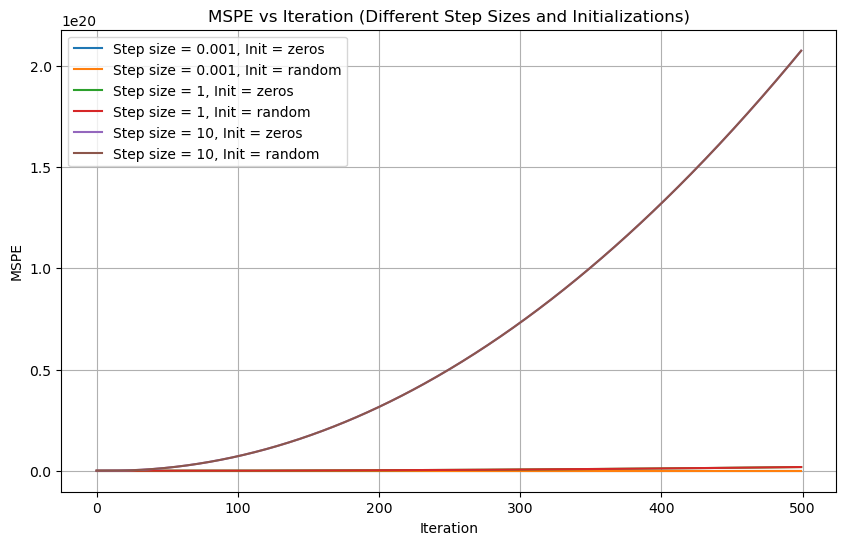

In [34]:
import matplotlib.pyplot as plt

#построение графиков
def plot_func_values(func_values, title):
    plt.figure(figsize=(10, 6))
    for values in func_values:
        plt.plot(values['func_values'], label=f"Step size = {values['step_size']}, Init = {values['init']}")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("MSPE")
    plt.legend()
    plt.grid(True)
    plt.show()

#параметры эксперимента
step_sizes = [0.001, 1, 10]  # Размеры шага
initializations = ['zeros', 'random']  # Способы инициализации весов
max_iter = 500  # Максимальное количество итераций
eps = 1e-6     # Точность останова

#результаты
results = []

#проверка на совпадение размерностей X_train_with_bias и y_train_clean
#сброс индексов для синхронизации данных
X_train_with_bias = np.hstack([np.ones((X_train_clean.shape[0], 1)), X_train_clean.values])
y_train_clean = y_train_clean.reset_index(drop=True)

if X_train_with_bias.shape[0] != y_train_clean.shape[0]:
    raise ValueError(f"Размерности X_train_with_bias ({X_train_with_bias.shape[0]}) и y_train_clean ({y_train_clean.shape[0]}) не совпадают!")

#цикл по всем комбинациям параметров
for step_size in step_sizes:
    for init in initializations:
        #инициализация весов
        if init == 'zeros':
            w0 = np.zeros(X_train_with_bias.shape[1])
        elif init == 'random':
            w0 = np.random.randn(X_train_with_bias.shape[1])

        #обучение модели без регуляризации
        try:
            w_opt, func_values = grad_descent(
                X=X_train_with_bias,
                y=y_train_clean,
                step_size=step_size,
                max_iter=max_iter,
                eps=eps,
                is_reg=False
            )

            #добавляем результаты
            results.append({
                'step_size': step_size,
                'init': init,
                'func_values': func_values
            })
        except Exception as e:
            print(f"Ошибка при step_size={step_size}, init={init}: {e}")

#вывод
plot_func_values(results, "MSPE vs Iteration (Different Step Sizes and Initializations)")

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Обучение модели без регуляризации...
Обучение модели с регуляризацией...


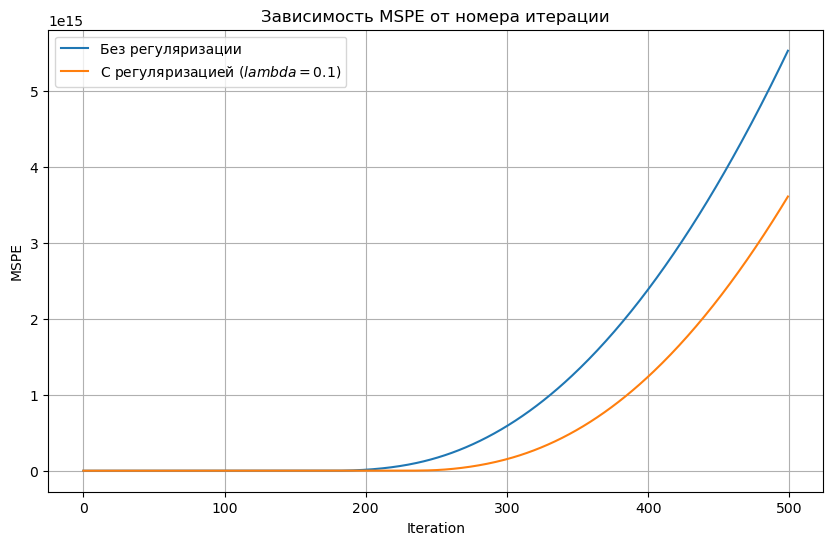

In [35]:
#параметры эксперимента
step_size = 0.1          #шаг
max_iter = 500           #максимальное количество итераций
eps = 1e-6               #точность
lambda_ = 0.1            #коэффициент регуляризации

#инициализация весов нулями
w0 = np.zeros(X_train_with_bias.shape[1])

#обучение модели без регуляризации
print("Обучение модели без регуляризации...")
w_opt_no_reg, func_values_no_reg = grad_descent(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=False
)

#с регуляризацией
print("Обучение модели с регуляризацией...")
w_opt_reg, func_values_reg = grad_descent(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=True,
    lambda_=lambda_
)

#вывод
plt.figure(figsize=(10, 6))
plt.plot(func_values_no_reg, label="Без регуляризации")
plt.plot(func_values_reg, label=f"С регуляризацией ($lambda = {lambda_}$)")
plt.title("Зависимость MSPE от номера итерации")
plt.xlabel("Iteration")
plt.ylabel("MSPE")
plt.legend()
plt.grid(True)
plt.show()

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту.

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?